Shift Managers were some of the most highly-compensated roles found in the previous analysis of the 2021 Ontario Sunshine List. It would be interesting to note the distribution and characteristics of this role which can be found in nearly every organization.

<h1>Loading data</h1>
<a id='Loading'></a>

Required libraries

In [4]:
import pandas as pd
from statsmodels import robust

Load CSV file containing [2021 Ontario Sunshine List.](https://www.ontario.ca/public-sector-salary-disclosure/2021/all-sectors-and-seconded-employees/)

In [5]:
df = pd.read_csv('2021_sunshine.csv')
df.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
0,Colleges,Aarts,Cheri,115618.46,74.25,Fanshawe College Of Applied Arts and Technology,Professor,2021,0
1,Colleges,Aaslepp,Drew,114506.79,124.66,Humber College Institute Of Technology and Adv...,Professor,2021,1
2,Colleges,Abba,Corinne,106770.74,124.45,George Brown College Of Applied Arts and Techn...,Librarian,2021,2
3,Colleges,Abbott,Brian,107378.44,124.61,Conestoga College Institute Of Technology and ...,Professor,2021,3
4,Colleges,Abbott,Kathleen,162873.26,428.40,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2021,4


Filter for Shift Manager positions.

In [11]:
df = df[df['Job Title'].str.contains('Shift Manager')]
df.head()

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
10693,Crown Agencies,Fletcher,Mark,109059.93,373.57,Liquor Control Board Of Ontario,"Shift Manager, Warehouse Operations / Chef d’é...",2021,10693
11228,Crown Agencies,Groke,Dave,109265.84,374.55,Liquor Control Board Of Ontario,"Shift Manager, Warehouse Operations / Chef d’é...",2021,11228
16518,Crown Agencies,Taylor,Lisa,114785.17,383.26,Liquor Control Board Of Ontario,"Shift Manager, Warehouse Operations / Chef d’é...",2021,16518
24669,Government of Ontario – Ministries,Fong,Richard,110953.96,144.24,Government and Consumer Services,Shift Manager,2021,24669
25919,Government of Ontario – Ministries,Haider,Mohammed,107835.28,131.84,Government and Consumer Services,Shift Manager,2021,25919


<h1>Trends in Shift Manager Positions</h1>
<a id='Trends'></a>

70 candidates found in list.

In [12]:
df.shape

(70, 9)

2 main bands of shift manager salaries: 100-150k and 300-350k.

<AxesSubplot:title={'center':'Distribution of Shift Manager Salaries in the 2021 Ontario Sunshine List'}, ylabel='Frequency'>

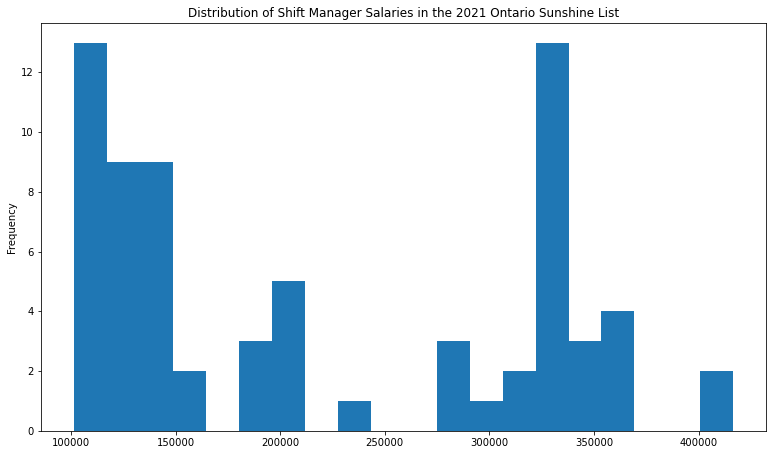

In [13]:
df['Salary'].plot.hist(
    bins=20,
    logy=False,
    title='Distribution of Shift Manager Salaries in the 2021 Ontario Sunshine List',
    xlabel='Salary Value in Millions of Canadian Dollars',
    figsize=(13,7.5))

**Sectors with the largest number of shift managers**

The majority of shift managers work for OPG.

<AxesSubplot:title={'center':'Proportion of 2021 Ontario Sunshine List Shift Managers by Sector'}, ylabel='Sector'>

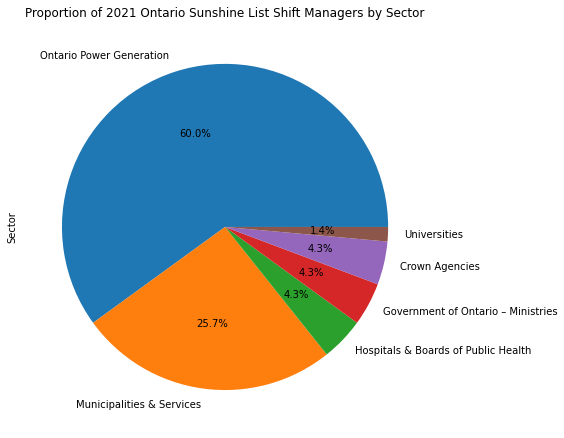

In [14]:
sectors = df['Sector'].value_counts()

sectors.plot.pie(
    autopct='%1.1f%%',
    startangle=0,
    title='Proportion of 2021 Ontario Sunshine List Shift Managers by Sector', 
    figsize=(13,7.5))

**Sectors by highest median Shift Manager salary**
<a id='Sectors1'></a>

Shift managers who earn above $100k seem to work primarily for OPG.

<AxesSubplot:title={'center':'2021 Ontario Sunshine List Sectors by Median Shift Manager Salary'}, xlabel='Sector'>

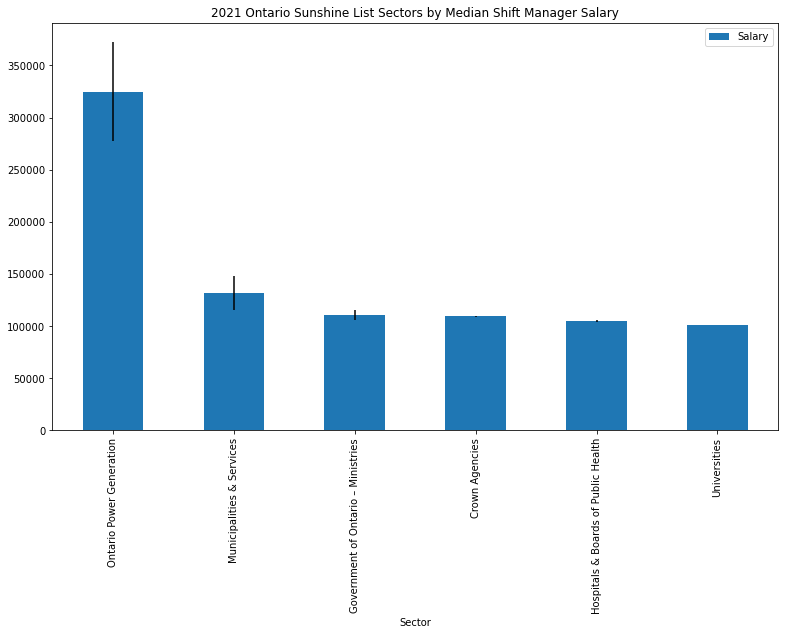

In [15]:
smed = df.groupby('Sector', as_index=False)['Salary'].median()
smed.sort_values(by='Salary', ascending=False, inplace=True)

serr = df.groupby('Sector')['Salary'].apply(robust.mad)

smed.plot.bar(
    'Sector', 
    'Salary', 
    yerr = serr,
    title='2021 Ontario Sunshine List Sectors by Median Shift Manager Salary',
    figsize=(13,7.5))

**Employers with the highest Shift Manager salaries**
<a id='Employers2'></a>

OPG's status as the top Shift Manager compensator is confirmed by an analysis of employers. Only 9 organizations had Shift Mananger positions.

<AxesSubplot:title={'center':'Top 2021 Ontario Sunshine List Employers by Shift Manager Salary'}, xlabel='Employer'>

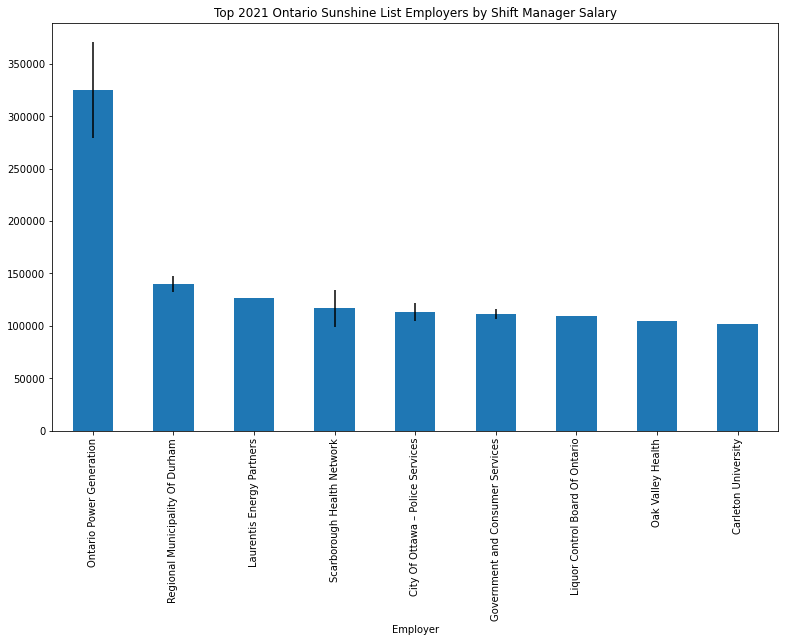

In [16]:
topemployers = df.groupby('Employer')['Salary']\
    .median().sort_values(ascending=False)

eerr = df.groupby('Employer')['Salary'].apply(robust.mad)

topemployers.plot.bar(
    yerr=eerr,
    title='Top 2021 Ontario Sunshine List Employers by Shift Manager Salary',
    figsize=(13,7.5))

<h1>Testing cells</h1>
<a id='Testing'></a>

In [18]:
df[df['Job Title'].str.contains('Shift Supervisor')]

,Sector,Last Name,First Name,Salary,Benefits,Employer,Job Title,Year,_docID
